<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공 신경망
---


## 핵심 키워드
---
- 인공 신경망
- 텐서플로
- 밀집층
- 원-핫 인코딩


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST
---
- MNIST 머신러닝과 딥러닝을 처음 배울 때 많이 사용하는 데이터 셋
- 0~9를 손으로 쓴 이미지 데이터이다. 28*28로 되어있고 6만개
- 패션 MNIST는 10개의 클래스
- 6만개의 셈플과 28*28개의 이미지가 있는 차원
- 케라스패키지를 임포트 하고 패션 MNIST데이터를 다운로드 가능

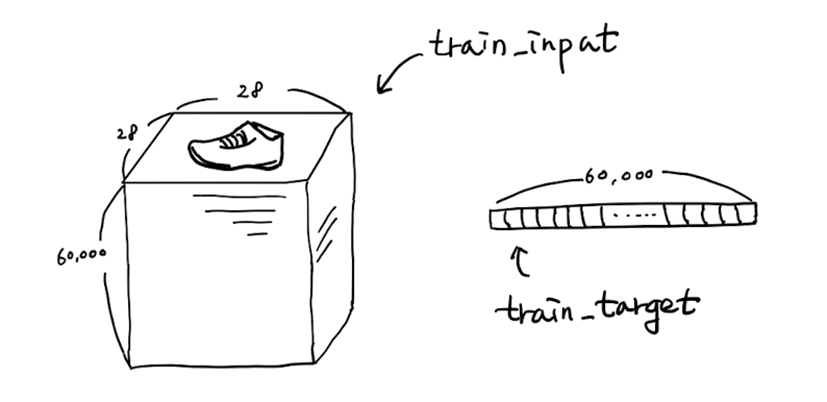

In [2]:
from tensorflow import keras

# load_data()함수는 훈련 데이터와 테스트 데이터를 나누어 반환
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- 28 * 28 사이즈의 이미지가 훈련세트에는 6만개, 테스트세트에는 1만개

In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


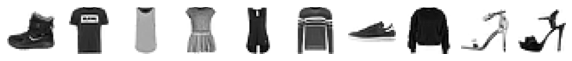

In [5]:
# 샘플 이미지 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [7]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- 각 레이블 :
0 티셔츠, 1 바지, 2 스웨터, 3 드레스, 4 코트, 5 샌달, 6 셔츠, 7 스니커즈, 8 가방, 9 앵클부츠
- 각 레이블마다 6000개의 샘플

## 로지스틱 회귀로 패션 아이템 분류하기
---
- 샘플은 60,000개나 되기 때문에 확률적 경사 하강법 사용
- SGDClassifier 클래스의 매개변수 loss='log' 로 지정하여 확률적 경사 하강법 모델 생성
- 10개의 클래스에 대한 선형 방정식을 구한 뒤, 소프트맥스 함수를 통과하여 각 클래스에 대한 확률로 분류

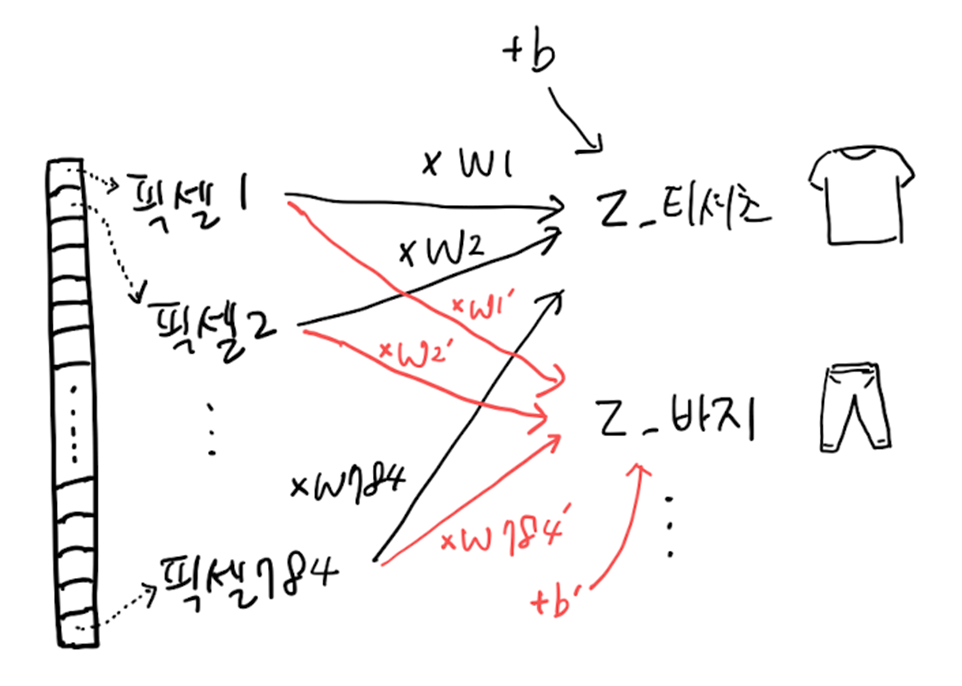

### 데이터를 표준화 전처리
---
- 데이터셋의 각 픽셀은 0~255 사이의 정수값
- 255로 나누어 0~1 사이의 값으로 정규화
- SGDClassifier는 2차원 입력을 다루지 못해, 1차원으로 변환

In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [9]:
print(train_scaled.shape)

(60000, 784)


In [10]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


- SGDClassifier 클래스와 cross_validate() 로 교차검증을 진행
- 반복횟수(max_iter)를 5로 주었지만 이를 더 큰 수로 반복횟수를 늘려도 크게 변하지 않음 => 다른 알고리즘의 모델이 필요함

In [11]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8313333333333333


In [12]:
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8436999999999999


## 인공신경망 ANN Artificial Neural Network 
---
- 가장 기본적인 인공 신경망은 확률형 경사 하강법을 사용하는 로지스틱 회귀와 동일
- 인공 신경망 모델을 만드는 최신 라이브러리들은 SGDClassifier에는 없는 몇 가지 기능을 제공
- 이 기능 덕텍에 더 좋은 성능을 가짐

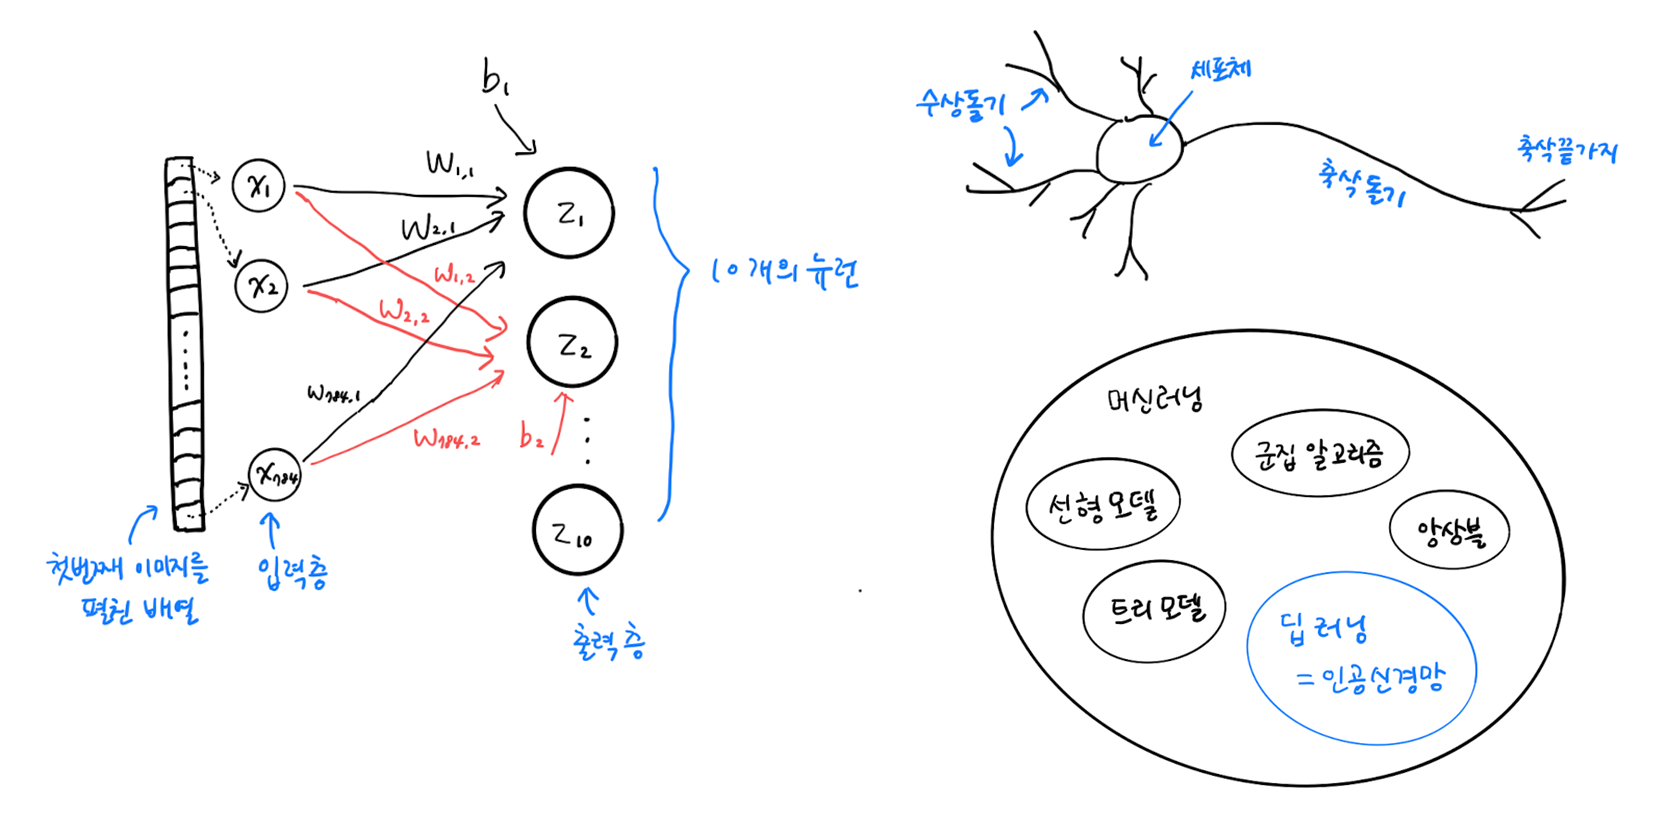

- 출력층 : 신경망의 최종 값을 의미
- 뉴런 : 인공 신경망에서 z값을 계산하는 단위
- 뉴런에서 수행하는 일은 선형 계산이 전부, 유닛이라고 많이 부름
- 입력층 : 픽셀값 자체, 특별한 계산을 수행하지 않음
- 생물학적 뉴런은 수상 돌기로부터 신호를 받아 세포체에 모은 후 신호가 어떤 임곗값에 도달하면 축삭 돌기를 통해 다른 세포에 신호를 전달
- 생물학적 뉴런이 하는 일을 실제로 구현한 것이 아님, 영감만 받음
- 인공신경망은 기존의 머신러닝 모델이 해결하지 못했던 문제에서 높은 성능을 나타내는 새로운 종류의 머신러닝 알고리즘
- 딥러닝은 인공 신경망과 거의 동의어로 사용 되며, 혹은 심층 신경망 DNN Deep Neural Network를 딥러닝이라고 함

### 텐서플로와 케라스
- 텐서플로는 구글이 오픈소스로 공개한 딥러닝 라이브러리
- 텐서플로에는 저수준 API와 고수준 API가 있는데 케라스가 텐서플로의 고수준 API
- 딥러닝 라이브러리가 다른 머신러닝 라이브러리와 다른 점은 그래픽 처리 장치인 GPU를 사용하여 인공 신경망을 훈련한다는 것
- GPU는 벡터와 행렬 연산에 매우 최적화되어 있기 때문에 곱셈과 덧셈이 많이 수행되는 인공 신경망에 큰 성능 보임
- 텐서플로 2.0부터는 케라스가 필수 API로 추가되어 케라스 == 텐서플로

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

## 인공신경망으로 모델 만들기
---
- 가장 기본적인 인공 신경망은 확률형 경사 하강법을 사용하는 로지스틱 회귀
- 로지스틱 회귀에서는 교차 검증을 이용해 모델을 평가
- 인공신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 따로 두고 사용
- 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적
- 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸리기 때문

In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
# 훈련 세트
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
# 검증 세트
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


### 밀집층 Dense
--- 
- 가장 기본이 되는 층
- 입력층은 784개의 뉴런으로 구성
- 출력층은 10개의 뉴런으로 구성
- 각 뉴런이 모두 연결되어야 하기 때문에, 784x10 = 7840개의 선이 포함
- 양쪽의 뉴런이 모두 연결되어 있기 때문에 완전 연결층이라고도 부름

|  Dense    |  Softmax    |
| ---- | ---- |
|   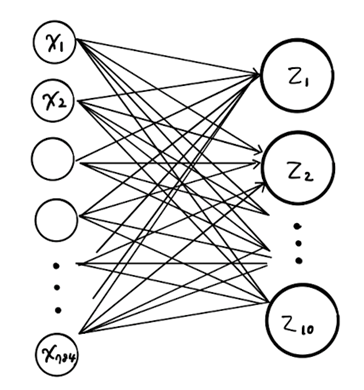   |  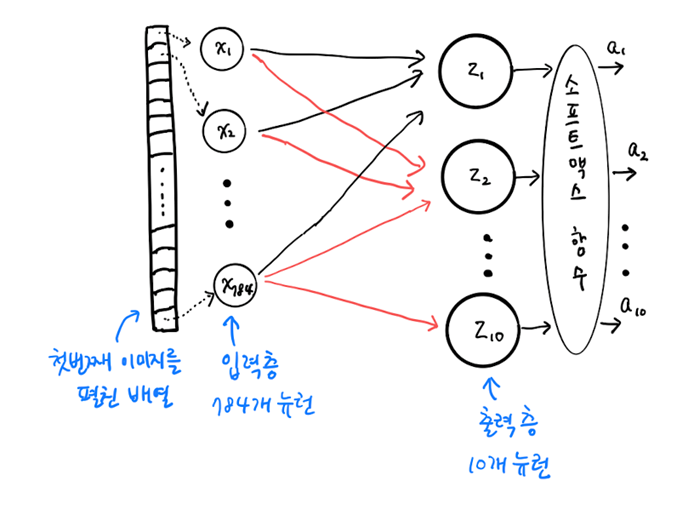    |



- 케라스의 Dense 클래스를 사용
- 필요한 매개변수는 출력층 뉴런의 개수와 뉴런의 출력에 적용할 함수(활성화 함수), 입력의 크기
- 출력층 뉴런의 개수 : 10
- 출력에 적용할 함수 activation : 소프트맥스 함수 (이진분류 이면 시그모이드 함수)
- 입력의 크기  input_shape : (784,)
- 밀집층을 가진 신경망 모델을 만들기 위해 Sequential 클래스를 사용

In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [19]:
model = keras.Sequential(dense)

### 훈련하기 전 해야하는 설정 compile()
--- 
- 케라스 모델은 훈련하기 전 손실함수 loss 매개변수 설정
- 이진 분류라면 binary_crossentropy, 다중 분류라면 categorical_crossentropy 
- 크로스 엔트로피 손실 함수를 사용 하려면 타깃 값이 해당 클래스만 1이고 나머진 0인 원-핫 인코딩 one-hot encoding 값이 어야 함
- sparse_categorical_crossentropy 손실함수를 사용하면 타깃값 정수로 사용 가능
- metrics 매개변수는 accuracy 를 지정하면 에포크마다 정확도를 함께 출력


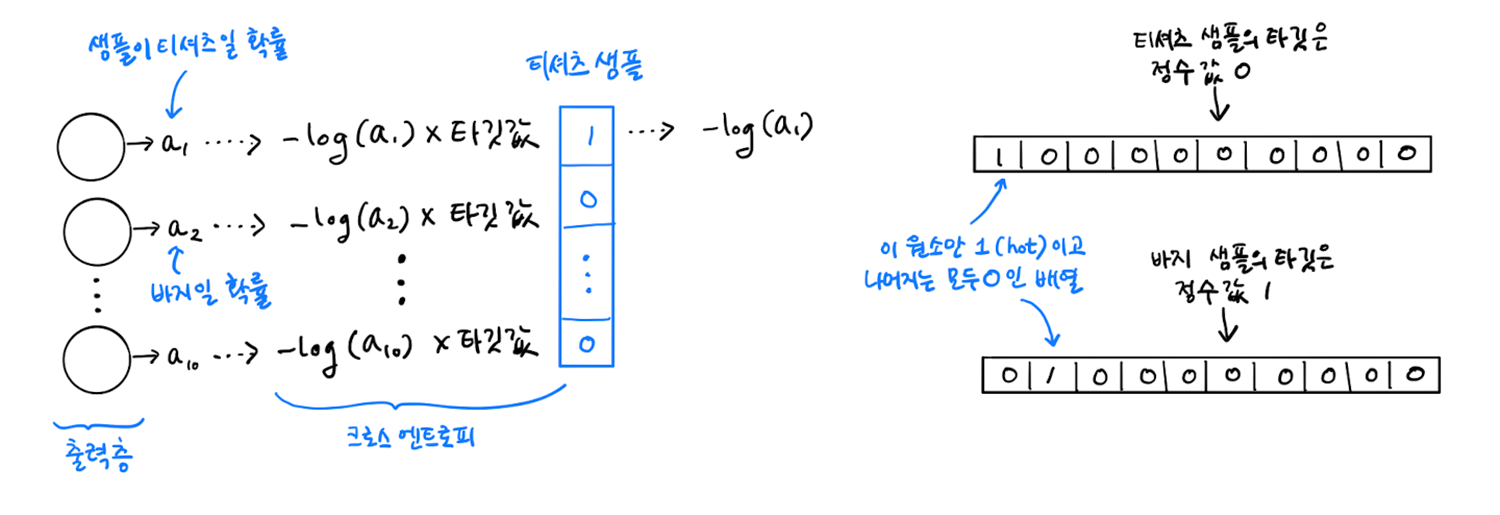

In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


- sparse_categorical_crossentropy 손실함수를 사용하면 타깃값 정수로 사용 가능

### 모델 훈련 fit()
---
- 모델 훈련은 fit()을 사용
- 매개변수로 입력과 타깃 그리고 반복할 에포크 횟수를 매개변수 epochs로 지정

In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4358 - accuracy: 0.8551


- 케라스는 에포크마다 걸린 시간과 손실, 정확도를 출력해줌
- 5번 반복에 정확도가 85%를 이상
- 성능을 평가하는 메서드는 evaluate() 

In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4579 - accuracy: 0.8483


[0.45794257521629333, 0.8483333587646484]

- 검증세트의 점수는 훈련 세트의 점수보다 조금 낮은 것이 일반적
- 예상대로 84%정도의 정확도

### 사이킷런 - 케라스 비고
---
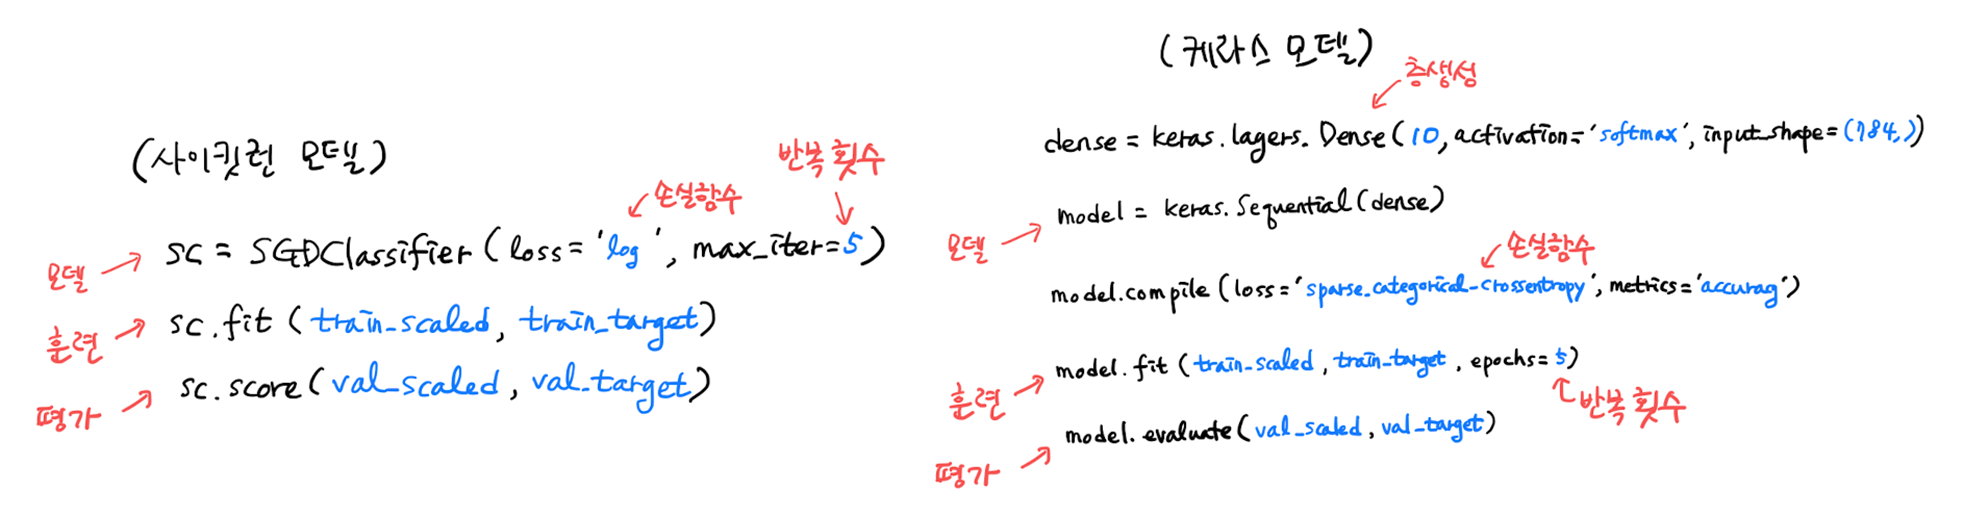
